# Classification Methods, SVMs, Tuning and CV


Like R, Python uses packages in data mining/machine learning. The 3 most common ones are Pandas (manipulation), Scikit Learn (machine learning) and Matplotlit (graphics).

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
from operator import itemgetter
import os
os.getcwd()

'F:\\OneDrive\\Application_Files\\GitHub\\Predictive_Models\\Week 3\\code'

In [4]:
#cd 'F:/OneDrive/Application_Files/GitHub/Predictive_Models/Week 3/code/'

os.chdir("F:/OneDrive/Application_Files/GitHub/Predictive_Models/Week 3/data/")

# Read in Data
# Churn Calls Data
This is a Pandas operation.

In [6]:
#import data
df = pd.read_csv("Churn_Calls.csv", sep=',')
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


In [8]:
# See each column name
print(df.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


In [9]:
df.shape

(5000, 20)

# Target 
In this step I took the target variable and moved it to the first column. I also made a reference to it called targetName. This just helps me with some below steps.

In [10]:
# designate target variable name
targetName = 'churn'
# move target variable into first column
targetSeries = df[targetName]
del df[targetName]
df.insert(0, targetName, targetSeries)
expected=targetName
df.head(10)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


# EDA
Just a touch of EDA. This is the distribution of the target. As you can see, the datset is imbalanced and the target class of interest "yes" is in the minority (a common occurance in classification).

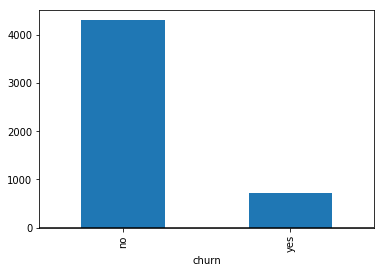

In [11]:
gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# Preprocessing
The below two steps are for preprocessing. The first cell changes the yes/no of the target to numeric. I needed to do this as some models require the target to be numeric. The second cell takes all the category features and creates dummies with them. This is stock code I have used for long time (and I did not write it). It is nice because it will take any dataframe of any size and handle categorial features. I do not have to change a single line in it. It can be used generically on bascially any dataframe. Saves a lot of time of coding each feature.

In [12]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

In [13]:
# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

# Test/Train
I split the data into a 67/33 train test. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". I used a biggest test when I have an imbalanced set. 

In [14]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.33, random_state=0)

Just a view of the size of each test/train set.
Note there are now 73 features, and the test set is imbalanced (14.4%)

In [15]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())
#data.groupby(['col1', 'col2'])

(1650, 73)
(3350, 73)
(1650,)
(3350,)
Percent of Target that is Yes 0.14363636363636365


# Models
All the models are done in Sci-Kit Learn.

# Decision Tree
I created a decision tree from the data. The accurancy of the model was 92.1%, while the test data classified at 92%. However notice that the "yes" class (the class I am interested in) only properly classified at 73% (precision) and 72% (recall). That is so-so. Again, not uncommon with imbalanced data. 

In [16]:
#Decision Tree train model
from sklearn import tree 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))

DT Accuracy Score 0.9193939393939394
              precision    recall  f1-score   support

   Fail = no       0.95      0.95      0.95      1413
  Fail = yes       0.72      0.71      0.72       237

   micro avg       0.92      0.92      0.92      1650
   macro avg       0.84      0.83      0.84      1650
weighted avg       0.92      0.92      0.92      1650



# Cross Validation of Decision Tree
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .92, which is quite close to the orginal model. I am not going to worry about over fitting.

In [17]:
#verify DT with Cross Validation
scores = cross_val_score(clf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.91343284 0.91343284 0.91343284 0.93134328 0.89850746 0.91044776
 0.91940299 0.92238806 0.93731343 0.90447761]


0.9164179104477611

#Visual of Confusion Matrix for Decision Tree

[[1348   65]
 [  68  169]]


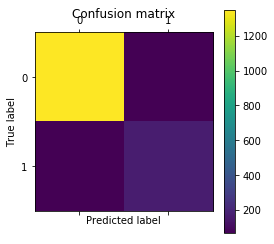

In [18]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_dt)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

#Random Forest
Using the same data, I built a random forest with 500 bootstrapped trees. Notice I parallelized this to 4 cores as big random forest can be computationally expensive. 

My overall results went up by 3% (.92 to .95) over the decision tree. Also, my minority target precision, but the recall decreased.  Also, I have a 100% in my output, and that always makes me hesitant  

In [19]:
# train random forest model
#paralleized to 4 cores 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True)
rf = rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print(accuracy_score(target_test, target_predicted_rf))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_rf))


0.9545454545454546
              precision    recall  f1-score   support

  Churn = no       0.95      1.00      0.97      1413
 Churn = yes       0.96      0.71      0.82       237

   micro avg       0.95      0.95      0.95      1650
   macro avg       0.96      0.85      0.90      1650
weighted avg       0.95      0.95      0.95      1650

[[1406    7]
 [  68  169]]


#Cross Validation of Random Forest
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .949, which is quite close to the orginal model. I am not going to worry about over fitting.

In [20]:
#verify RF with cross validation

scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.95522388 0.94328358 0.94328358 0.95223881 0.96119403 0.94328358
 0.95820896 0.94328358 0.95223881 0.95223881]


0.9504477611940297

# Visual of Confusion Matrix for Random Forest

[[1406    7]
 [  68  169]]


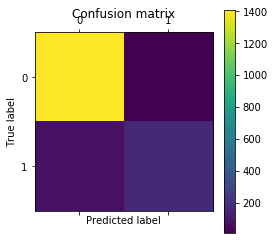

In [21]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_rf)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

# Hyperparameter Tuning
You can tune any argument in these models. I did a grid search only on max_features (mtry in R). I parallelized the job to 4 cores for speed. You can see that max_features (mtry) of 5 had the best results. But frankly was very little difference from the other parameter results.

In [23]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [22]:
# use a full grid over all parameters
param_grid = {"max_features": [2, 3, 4, 5]}
start_time = time.clock()




# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print(grid_search.cv_results_)


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time to run 26.095721767612908 seconds
{'mean_fit_time': array([5.29678361, 4.98433614, 6.00677371, 7.15619262]), 'std_fit_time': array([0.67023301, 0.23675621, 0.69805341, 0.08012664]), 'mean_score_time': array([0.49633916, 1.08941968, 1.16854008, 0.4880302 ]), 'std_score_time': array([0.15126657, 0.3214307 , 0.83950487, 0.13822498]), 'param_max_features': masked_array(data=[2, 3, 4, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 3}, {'max_features': 4}, {'max_features': 5}], 'split0_test_score': array([0.87466428, 0.88898836, 0.90152193, 0.91584602]), 'split1_test_score': array([0.89794091, 0.90778872, 0.92569382, 0.93196061]), 'split2_test_score': array([0.88978495, 0.90770609, 0.9202509 , 0.93189964]), 'mean_test_score': array([0.88746269, 0.90149254, 0.9158209 , 0.92656716]), 'std_test_score': array([0.00964475, 0.00884383, 0.01035436, 0.00758273]), 'rank_test_score': array([4, 

# KNN
I performed KNN on K=3 and K=5. For both K's the accurancy was 85% and 87% respectively and I still have problems with the minority class. KNN and Decision Tree perform about the same. I find this to be true frequently, which is why I use them as my base comparative models. 

# More Details
Now that we know our random forest was the best model of the three I ran, I will gather some other information. Below is a non-ordered list of feature importance. I only showed 20 for purposes of space.

In [24]:
print("Features sorted by their score:")
print("Higher the more important")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),df.columns[1:20]), 
             reverse=True))

Features sorted by their score:
Higher the more important
[(0.1251, 'total_day_charge'), (0.1222, 'total_day_minutes'), (0.0981, 'number_customer_service_calls'), (0.0554, 'total_eve_charge'), (0.0542, 'total_eve_minutes'), (0.0473, 'total_intl_calls'), (0.0422, 'total_intl_charge'), (0.0413, 'total_intl_minutes'), (0.0369, 'total_night_charge'), (0.0368, 'total_night_minutes'), (0.0315, 'account_length'), (0.0308, 'total_night_calls'), (0.0301, 'total_day_calls'), (0.0283, 'total_eve_calls'), (0.0175, 'number_vmail_messages'), (0.0023, 'state_AZ'), (0.0015, 'state_AR'), (0.0009, 'state_AL'), (0.0007, 'state_AK')]


# ROC curve for Random Forest
Finally a ROC curve that shows the lift I get from the Random Forest model. 

ROC AUC: 0.917


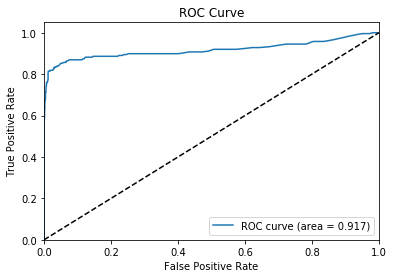

In [25]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest does the best, but I still am not getting the accurancy on my target class of interest. I have a few tricks I can do to work on this, but that is for another day/class.

# SUPPORT VECTOR MACHINES

linear SVM with L2 penalty, Cost function of 1 and auto class weight. 

In [26]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, class_weight='balanced')
clf_linSVC.fit(features_train, target_train)
predicted_SVC=clf_linSVC.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVC))
print(accuracy_score(expected,predicted_SVC))

              precision    recall  f1-score   support

          No       0.87      0.98      0.92      1413
         Yes       0.53      0.17      0.26       237

   micro avg       0.86      0.86      0.86      1650
   macro avg       0.70      0.57      0.59      1650
weighted avg       0.83      0.86      0.83      1650

[[1378   35]
 [ 197   40]]
0.8593939393939394


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# SVC kernel= linear
# Change Class_Weight

In [25]:
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=1.0,class_weight=None,gamma='auto')
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print(accuracy_score(expected,predicted_SVM))
print(time.clock() - start_time, "seconds")

             precision    recall  f1-score   support

         No       0.86      1.00      0.92      1413
        Yes       1.00      0.01      0.02       237

avg / total       0.88      0.86      0.79      1650

[[1413    0]
 [ 234    3]]
0.858181818182
113.23818786310746 seconds


In [23]:
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=1.0,class_weight='balanced',gamma='auto')
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print(accuracy_score(expected,predicted_SVM))
print("Time to run", time.clock() - start_time, "seconds")

             precision    recall  f1-score   support

         No       0.96      0.74      0.84      1708
        Yes       0.35      0.80      0.49       292

avg / total       0.87      0.75      0.79      2000

[[1271  437]
 [  57  235]]
0.753
Time to run 141.223871 seconds


# Grid Search of Cost Function (with cross validation)

# This takes a long time to run

In [26]:
start_time = time.clock()
from sklearn.svm import SVC
parameters = {'C':[.01,.05,1,3,4,9,10]}
svr = SVC(kernel='linear')
grid_svm = GridSearchCV(svr, parameters,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
print("Time to run", time.clock() - start_time, "seconds")

SCORES {'mean_fit_time': array([  21.752175  ,   40.0980094 ,  161.93399177,  290.43863273,
        322.20625391,  522.04067974,  452.9337081 ]), 'std_fit_time': array([   3.49640183,    8.5169516 ,   12.65405751,   59.87422887,
         97.47917538,  100.53787287,   57.35188013]), 'mean_score_time': array([ 0.04440441,  0.04380441,  0.03640366,  0.03579717,  0.05039139,
        0.09767284,  0.01871958]), 'std_score_time': array([ 0.01430671,  0.012641  ,  0.00048998,  0.0007523 ,  0.024355  ,
        0.14783278,  0.00623982]), 'param_C': masked_array(data = [0.01 0.05 1 3 4 9 10],
             mask = [False False False False False False False],
       fill_value = ?)
, 'params': [{'C': 0.01}, {'C': 0.05}, {'C': 1}, {'C': 3}, {'C': 4}, {'C': 9}, {'C': 10}], 'split0_test_score': array([ 0.85970149,  0.85970149,  0.85970149,  0.87910448,  0.8761194 ,
        0.86865672,  0.86865672]), 'split1_test_score': array([ 0.85970149,  0.85970149,  0.86119403,  0.86865672,  0.86716418,
        0.8

# Grid Search of Several Functions (with cross validation)

# This take a long time to run

In [27]:
start_time = time.clock()
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[.001,.01,1,3,5,10]}
svr = SVC()
grid_svm = GridSearchCV(svr, parameters,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST Estm",grid_svm.best_estimator_) 
print("BEST SCORE",grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
print("Time to run", time.clock() - start_time, "seconds")

KeyboardInterrupt: 

# How does "Best" perform?

In [26]:
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=10.0,class_weight='balanced',gamma='auto')
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print(accuracy_score(expected,predicted_SVM))
print("Time to run", time.clock() - start_time, "seconds")

             precision    recall  f1-score   support

         No       0.95      0.71      0.82      1708
        Yes       0.32      0.79      0.46       292

avg / total       0.86      0.73      0.76      2000

[[1221  487]
 [  62  230]]
0.7255
Time to run 729.06263 seconds


# SVM using a RBF (non-linear) Kernel (High dimensional Space). Untuned.

In [13]:
start_time = time.clock()
from sklearn.svm import SVC
#standard linear SVC
clf_rbf = SVC(kernel='rbf', C=1.0, degree=3, class_weight='balanced',gamma=0.1)
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_rbf,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_rbf))
print(accuracy_score(expected,predicted_rbf))
print("Time to run", time.clock() - start_time, "seconds")

             precision    recall  f1-score   support

         No       0.86      1.00      0.92      1413
        Yes       0.00      0.00      0.00       237

avg / total       0.73      0.86      0.79      1650

[[1413    0]
 [ 237    0]]
0.856363636364
Time to run 3.057228316151203 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM using Polynominal Kernel (2nd Degree), untuned.
Would not fit at 2nd and 3rd degree given 24 hours

from sklearn.svm import SVC
#standard linear SVC
clf_poly = SVC(kernel='poly', degree=2, C=1.0,class_weight=None)
clf_poly.fit(features_train, target_train)
predicted_poly=clf_poly.predict(features_test)
expected = target_test
#summarize the fit of the model
print(classification_report(expected, predicted_poly,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_poly))
print accuracy_score(expected,predicted_poly)